##### Bibliotecas

In [23]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

##### Antecedentes e Consequentes

In [2]:
# antecedentes
temperatura = ctrl.Antecedent(np.arange(800, 1201, 1), 'temperatura')
pressao = ctrl.Antecedent(np.arange(4, 13, 1), 'pressao')

# consequentes
vazao = ctrl.Consequent(np.arange(0, 3.5, 0.5), 'vazao')

##### Funções

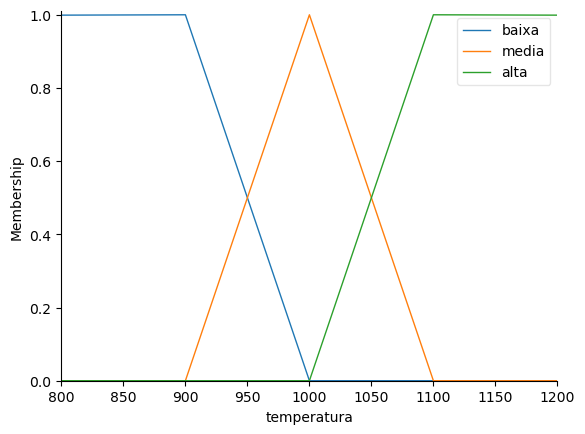

In [3]:
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [-99999, 900, 900, 1000])
temperatura['media'] = fuzz.trimf(temperatura.universe, [900, 1000, 1100])
temperatura['alta'] = fuzz.trapmf(temperatura.universe, [1000, 1100, 1100, 99999])
temperatura.view()

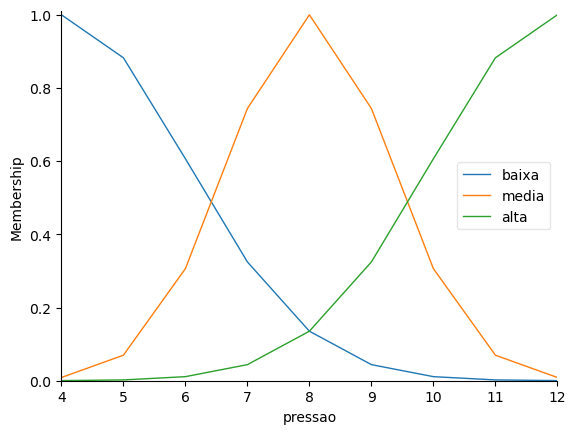

In [4]:
pressao['baixa'] = fuzz.gaussmf(pressao.universe, 4, 2)
pressao['media'] = fuzz.gaussmf(pressao.universe, 8, 1.3)
pressao['alta'] = fuzz.gaussmf(pressao.universe, 12, 2)
pressao.view()

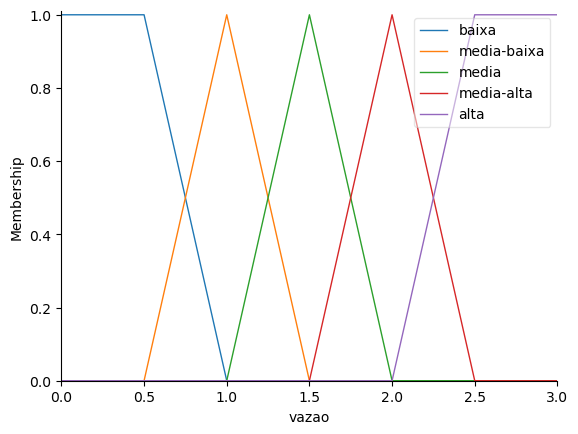

In [5]:
vazao['baixa'] = fuzz.trapmf(vazao.universe, [-99999, 0.5, 0.5, 1])
vazao['media-baixa'] = fuzz.trimf(vazao.universe, [0.5, 1, 1.5])
vazao['media'] = fuzz.trimf(vazao.universe, [1, 1.5, 2])
vazao['media-alta'] = fuzz.trimf(vazao.universe, [1.5, 2, 2.5])
vazao['alta'] = fuzz.trapmf(vazao.universe, [2, 2.5, 2.5, 99999])
vazao.view()

##### Regras

In [6]:
regra1 = ctrl.Rule((temperatura['baixa'] & pressao['baixa']), vazao['baixa'])
regra2 = ctrl.Rule(temperatura['baixa'] & pressao['media'], vazao['media-baixa'])
regra3 = ctrl.Rule(temperatura['baixa'] & pressao['alta'], vazao['media'])
regra4 = ctrl.Rule(temperatura['media'] & pressao['baixa'], vazao['media-baixa'])
regra5 = ctrl.Rule(temperatura['media'] & pressao['media'], vazao['media'])
regra6 = ctrl.Rule(temperatura['media'] & pressao['alta'], vazao['media-alta'])
regra7 = ctrl.Rule(temperatura['alta'] & pressao['baixa'], vazao['media'])
regra8 = ctrl.Rule(temperatura['alta'] & pressao['media'], vazao['media-alta'])
regra9 = ctrl.Rule(temperatura['alta'] & pressao['alta'], vazao['alta'])

##### Sistema de Controle 1

In [7]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5,
                                       regra6, regra7, regra8, regra9])

sistema = ctrl.ControlSystemSimulation(sistema_controle)
resultados = []

##### a) Gerar as saídas de Vazão para os seguintes valores de entrada de Temperatura e Pressão:


0.9935066753501732


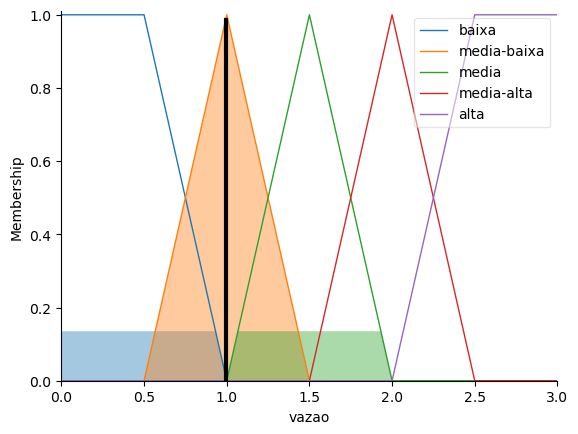

In [8]:
# teste 01
valores = {'temperatura': 850, 'pressao': 8}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[0])
vazao.view(sistema)

0.4229786137109604


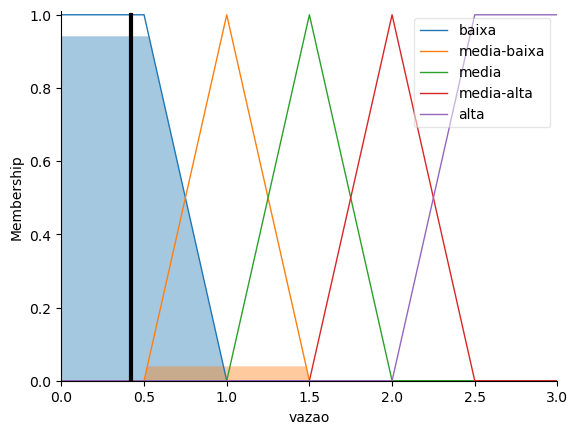

In [9]:
# teste 02
valores = {'temperatura': 900, 'pressao': 4.5}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[1])
vazao.view(sistema)

1.6439506597769014


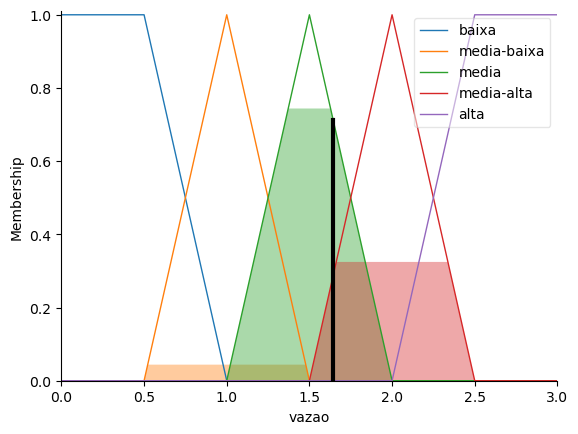

In [10]:
# teste 03
valores = {'temperatura': 1000, 'pressao': 9}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[2])
vazao.view(sistema)

1.696432013233779


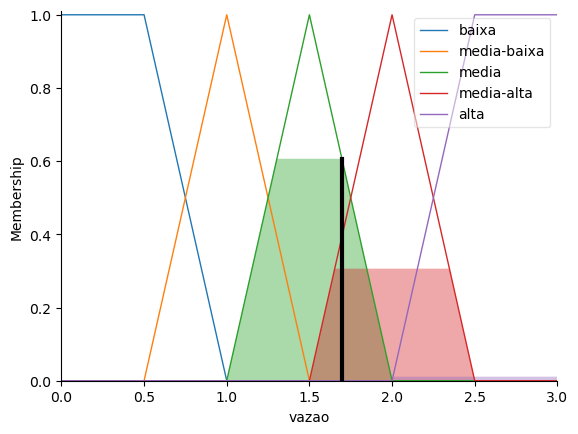

In [11]:
# teste 04
valores = {'temperatura': 1100, 'pressao': 6}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[3])
vazao.view(sistema)

2.38217749206778


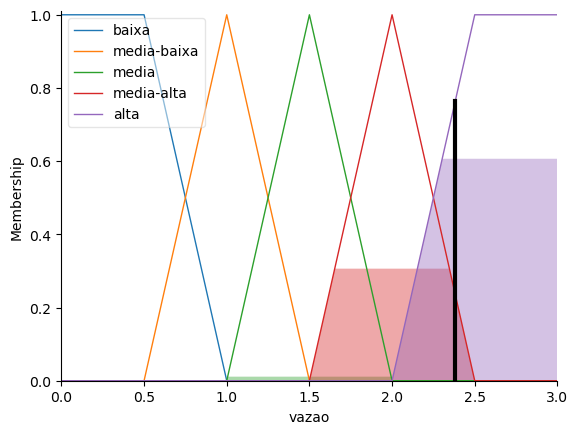

In [12]:
# teste 05
valores = {'temperatura': 1150, 'pressao': 10}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[4])
vazao.view(sistema)

1.4414791543911465


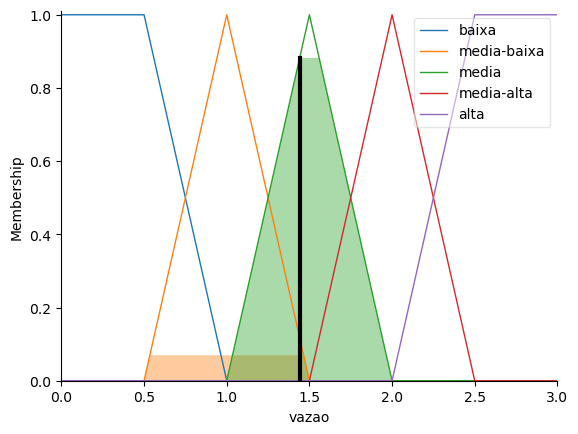

In [13]:
# teste 06
valores = {'temperatura': 880, 'pressao': 11}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[5])
vazao.view(sistema)

1.0577515521644705


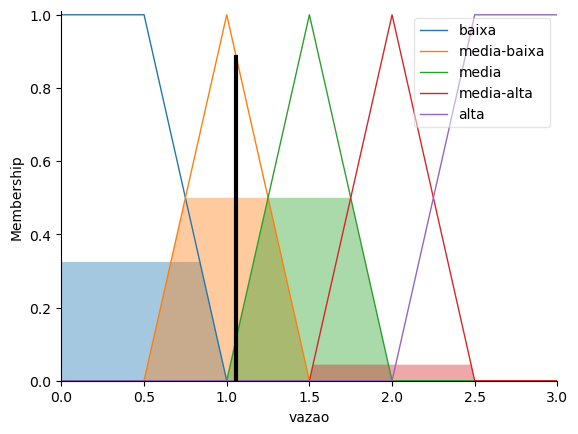

In [14]:
# teste 07
valores = {'temperatura': 950, 'pressao': 7}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[6])
vazao.view(sistema)

1.3073630588950766


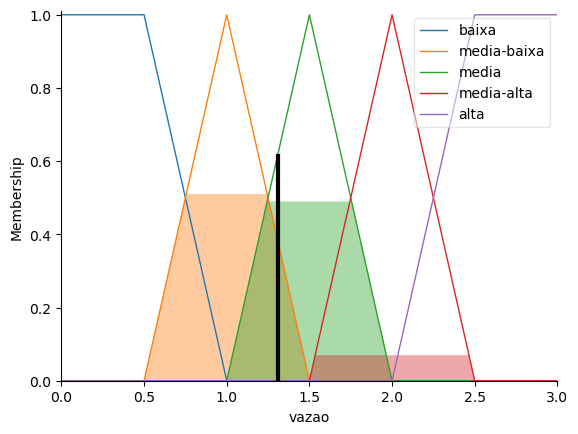

In [15]:
# teste 08
valores = {'temperatura': 1049, 'pressao': 5}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[7])
vazao.view(sistema)

1.7714109813997767


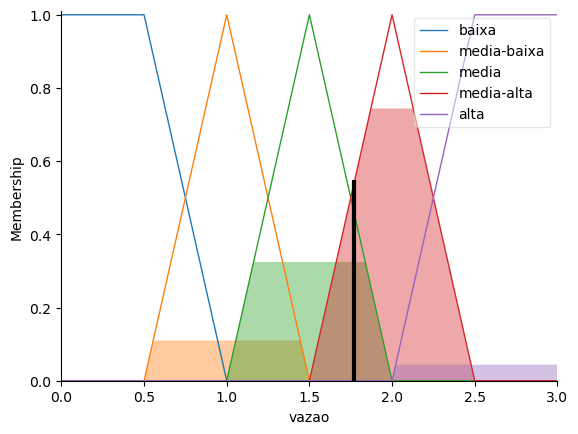

In [16]:
# teste 09
valores = {'temperatura': 1089, 'pressao': 7}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[8])
vazao.view(sistema)

2.173545822739864


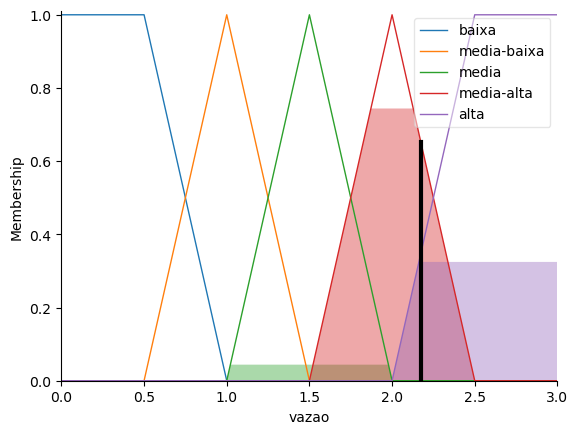

In [17]:
# teste 10
valores = {'temperatura': 1170, 'pressao': 9}
sistema.inputs(valores)
sistema.compute()
resultados.append(sistema.output['vazao'])
print(resultados[9])
vazao.view(sistema)

##### Erros Relativos (%)

In [18]:
vazao_desejada = [1.01, 0.42, 1.63, 1.70, 2.43,
                  1.47, 1.01, 1.26, 1.74, 2.15]

erros = []
for i in range(10):
    erro = (abs(resultados[i] - vazao_desejada[i]) / vazao_desejada[i]) * 100
    print(f'{i+1}º Erro Relativo Percentual: {erro:.2f}%')
    erros.append(erro)

1º Erro Relativo Percentual: 1.63%
2º Erro Relativo Percentual: 0.71%
3º Erro Relativo Percentual: 0.86%
4º Erro Relativo Percentual: 0.21%
5º Erro Relativo Percentual: 1.97%
6º Erro Relativo Percentual: 1.94%
7º Erro Relativo Percentual: 4.73%
8º Erro Relativo Percentual: 3.76%
9º Erro Relativo Percentual: 1.81%
10º Erro Relativo Percentual: 1.10%


#####  b) Calcular também o “Erro Relativo Médio” dos resultados do teste:

In [19]:
print(f'Erro Relativo Percentual Médio: {sum(erros) / len(erros):.2f}%')

Erro Relativo Percentual Médio: 1.87%


##### c) Plotar a superfície de saída do Sistema Fuzzy em função de suas entradas:

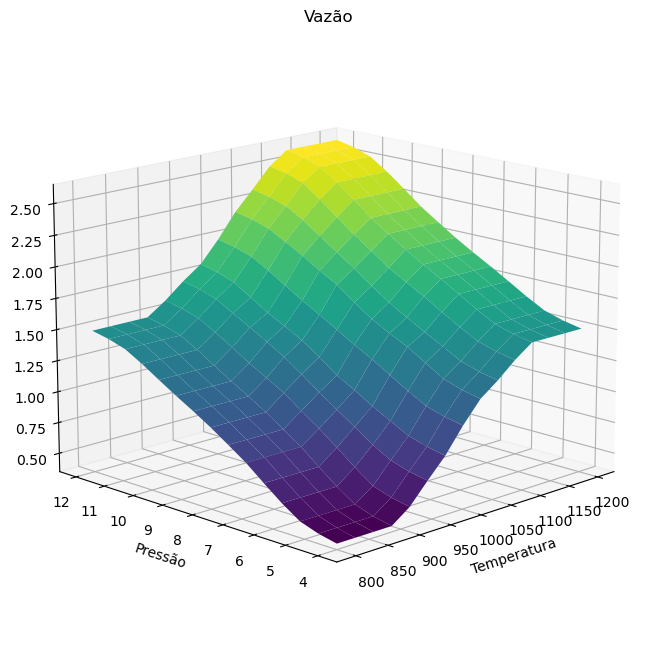

In [20]:
sistema = ctrl.ControlSystemSimulation(sistema_controle, flush_after_run = 15 * 15 + 1)

amostraX = np.linspace(800, 1200, 15)
amostraY = np.linspace(4, 12, 15)
amostraZ = np.linspace(0, 3, 15)

x, y = np.meshgrid(amostraX, amostraY)
z, _ = np.meshgrid(amostraZ, amostraZ)
z = np.zeros_like(z)

for i in range(15):
    for j in range(15):
        sistema.input['temperatura'] = x[i, j]
        sistema.input['pressao'] = y[i, j]
        sistema.compute()
        z[i, j] = sistema.output['vazao']


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', frame_on=False)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-3, cmap='viridis', alpha=0.5)
plt.xlabel('Temperatura')
plt.ylabel('Pressão')
plt.title('Vazão')
ax.view_init(15, 225)

##### d) Gere uma matriz de valores (referentes à superfície fuzzy), tendo-se as seguintes discretizações para os universos de discurso das variáveis de entrada:

In [28]:
sistema = ctrl.ControlSystemSimulation(sistema_controle, flush_after_run = 10 * 10 + 1)

amostraX = np.linspace(800, 1200, 10)
amostraY = np.linspace(4, 12, 10)
amostraZ = np.linspace(0, 3, 10)

x, y = np.meshgrid(amostraX, amostraY)
z, _ = np.meshgrid(amostraZ, amostraZ)
z = np.zeros_like(z)

for i in range(10):
    for j in range(10):
        sistema.input['temperatura'] = x[i, j]
        sistema.input['pressao'] = y[i, j]
        sistema.compute()
        z[i, j] = sistema.output['vazao'].round(2)

z = pd.DataFrame(z, index = amostraX.round(2), columns = amostraY.round(2))
display(z)

,4.00,4.89,5.78,6.67,7.56,8.44,9.33,10.22,11.11,12.00
800.00,0.40,0.40,0.40,0.61,0.85,1.15,1.32,1.51,1.51,1.51
844.44,0.44,0.44,0.44,0.65,0.89,1.20,1.36,1.55,1.55,1.55
888.89,0.58,0.58,0.58,0.77,1.01,1.33,1.48,1.67,1.67,1.67
933.33,0.76,0.76,0.76,0.96,1.14,1.46,1.61,1.81,1.81,1.81
977.78,0.92,0.92,0.92,1.10,1.26,1.58,1.74,1.94,1.94,1.94
1022.22,1.06,1.06,1.06,1.26,1.42,1.74,1.90,2.08,2.08,2.08
1066.67,1.19,1.19,1.19,1.39,1.54,1.86,2.04,2.24,2.24,2.24
1111.11,1.33,1.33,1.33,1.52,1.67,1.99,2.23,2.42,2.42,2.42
1155.56,1.45,1.45,1.45,1.64,1.80,2.11,2.35,2.56,2.56,2.56
1200.00,1.49,1.49,1.49,1.68,1.85,2.15,2.39,2.60,2.60,2.60


##### e) Após a compilação da matriz fuzzy, obtenha (a partir dela) o valor da vazão para cinco entradas próximas das entradas na primeira tabela:

In [38]:
# tabela 01
tabela01 = pd.DataFrame({'teste': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'temperatura': [850, 900, 1000, 1100, 1150,
                                         880, 950, 1049, 1089, 1170],
                         'pressao': [8, 4.5, 9, 6, 10, 11, 7, 5, 7, 9],
                         'vazao': [0.99, 0.42, 1.64, 1.69, 2.38, 
                                   1.44, 1.05, 1.30, 1.77, 2.17],
                         'vazao desejada': [1.01, 0.42, 1.63, 1.70, 2.43, 
                                            1.47, 1.01, 1.26, 1.74, 2.15],
                         'erro relativo': ['1.63%', '0.71%', '0.86%', '0.21%', '1.97%', 
                                           '1.94%', '4.73%', '3.76%', '1.81%', '1.10%']})
tabela01.set_index('teste', inplace=True)
display(tabela01)

,temperatura,pressao,vazao,vazao desejada,erro relativo
teste,,,,,
1,850,8.0,0.99,1.01,1.63%
2,900,4.5,0.42,0.42,0.71%
3,1000,9.0,1.64,1.63,0.86%
4,1100,6.0,1.69,1.70,0.21%
5,1150,10.0,2.38,2.43,1.97%
6,880,11.0,1.44,1.47,1.94%
7,950,7.0,1.05,1.01,4.73%
8,1049,5.0,1.30,1.26,3.76%
9,1089,7.0,1.77,1.74,1.81%


In [45]:
# tabela 02 - a partir da matriz
tabela01 = pd.DataFrame({'teste comparado': [1, 3, 4, 5, 6],
                         'temperatura': [844.44, 1022.22, 1066.67, 1155.56, 888.89],
                         'pressao': [8.44, 9.33, 5.78, 10.22, 11.11],
                         'vazao': [1.20, 1.90, 1.19, 2.56, 1.67]})
tabela01.set_index('teste comparado', inplace=True)
display(tabela01)

,temperatura,pressao,vazao
teste comparado,,,
1,844.44,8.44,1.20
3,1022.22,9.33,1.90
4,1066.67,5.78,1.19
5,1155.56,10.22,2.56
6,888.89,11.11,1.67


##### f) Defina dois outros operadores fuzzy para a implementação do conectivo lógico “e’, diferentes daqueles que você utilizou nos antecedentes das nove regras. Verifique a sensibilidade das saídas produzidas pelo sistema, compare com os resultados obtidos no item 1:

##### g) Defina dois outros tipos de defuzzificação. Verifique a sensibilidade das saídas produzidas, compare com os resultados obtidos no item 1:

##### Sistema de Controle 2... depois que finalizar todos os itens para o sistema 1, irei fazer para o 2

In [ ]:
sistema_controle2 = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5,
                                       regra6, regra7, regra8, regra9])

sistema2 = ctrl.ControlSystemSimulation(sistema_controle2)